In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap

In [2]:
data = pd.read_csv('ENB2012_data.csv')

In [3]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
X = data.iloc[:, :-2]
y = data.iloc[:,[-2,-1]]
cols = X.columns.values


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_imputed = scaler.fit_transform(X[cols])

<IPython.core.display.Javascript object>


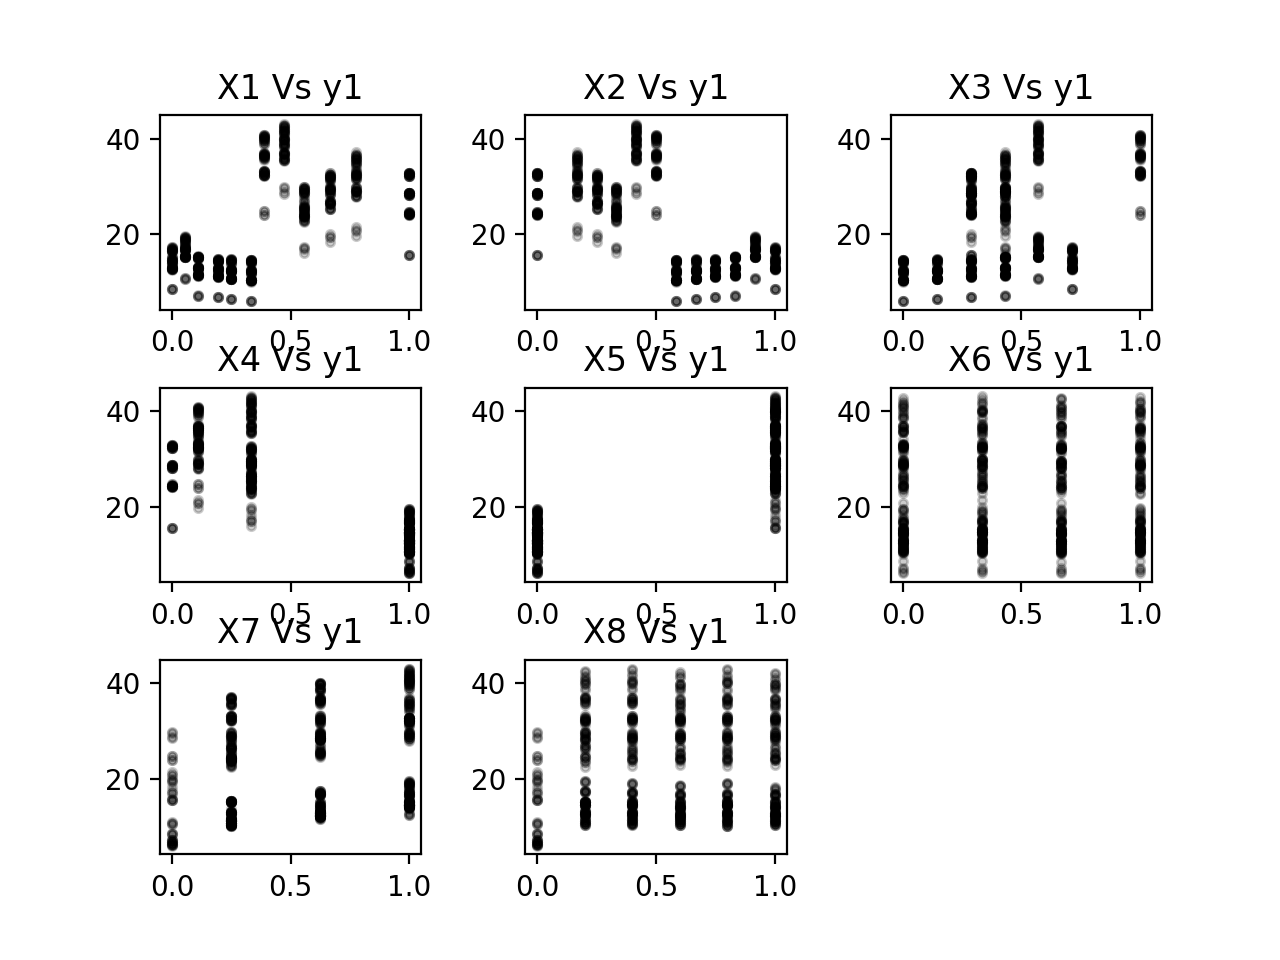

In [85]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,9):
    ax = fig.add_subplot(3, 3, i)
    ax.set_title("X"+str(i)+" Vs y1")
    ax.plot(X_imputed[:,i-1], y.iloc[:,0], 'ok', markersize=3, alpha=0.2)

<IPython.core.display.Javascript object>


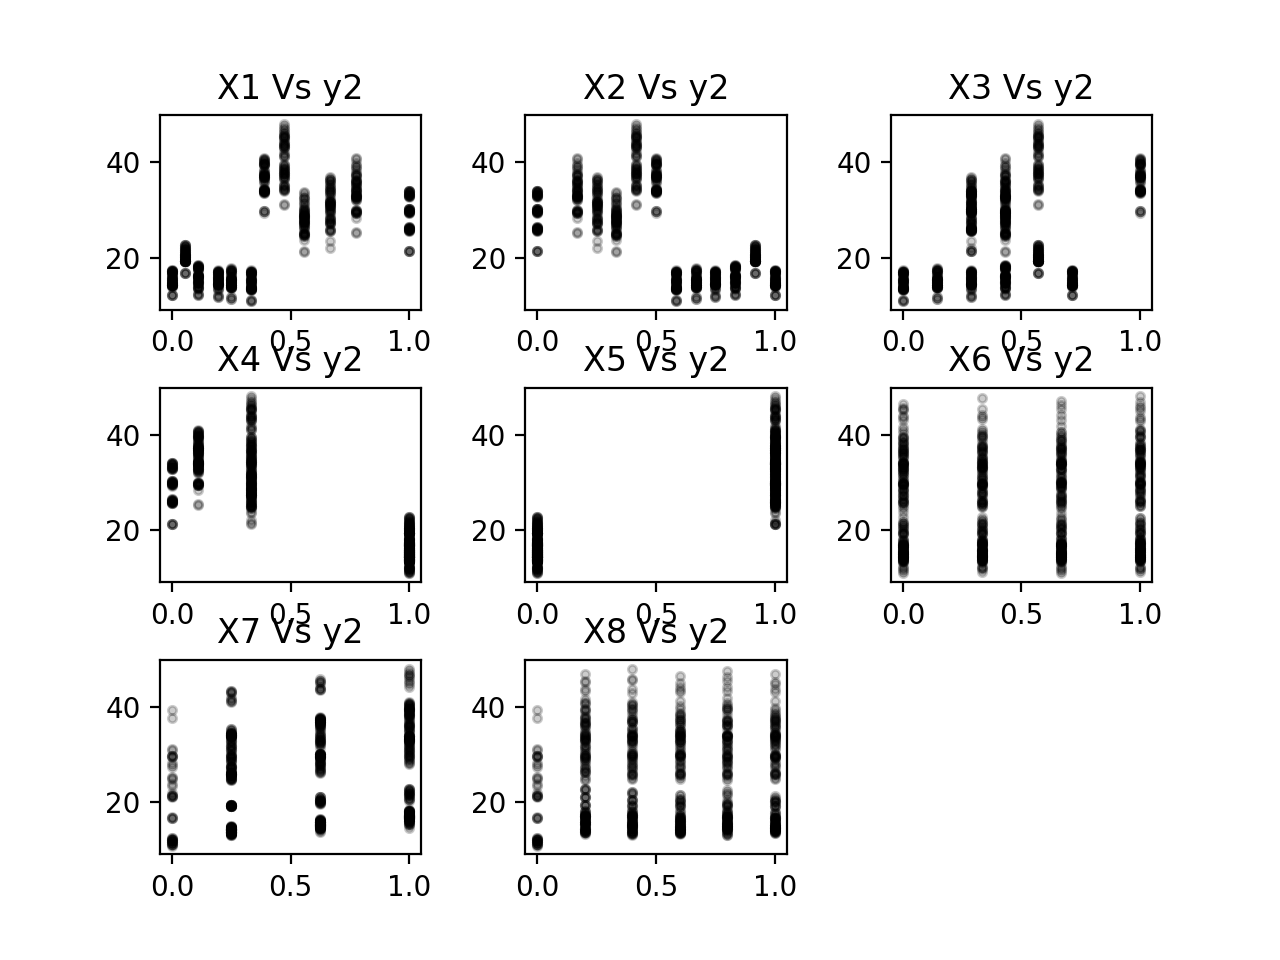

In [7]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,9):
    ax = fig.add_subplot(3, 3, i)
    ax.set_title("X"+str(i)+" Vs y2")
    ax.plot(X_imputed[:,i-1], y.iloc[:,1], 'ok', markersize=3, alpha=0.2)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=10)

In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [28]:
linreg1=model.fit(X_train,y_train.iloc[:,0])
linreg2=model.fit(X_train,y_train.iloc[:,1])

In [29]:
print ('Residual sum of squares Train: %.2f' % np.mean((model.predict(X_train)- y_train.iloc[:,1]) ** 2))
print ('Residual sum of squares Test: %.2f' % np.mean((model.predict(X_test)- y_test.iloc[:,1]) ** 2))

Residual sum of squares Train: 10.65
Residual sum of squares Test: 9.05


In [30]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import tensorflow as tf

In [31]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

## Neural Network

In [32]:


def create_model():
    #create model
    model = Sequential()
    model.add(Dense(12, input_dim=30, activation='relu'))# 
    model.add(Dense(8, activation='relu')) #hidden layer 
    model.add(Dense(1, activation='sigmoid')) # output layer
        #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])# loss funtion as continous 
   para_grid = {'epochs':[50,100,200], 'batch_size':[5,10,20,50,100]}

keras_classifier = KerasClassifier(build_fn = create_model , verbose = 0)

grid_search = GridSearchCV(keras_classifier,para_grid, cv =10)

grid_search.fit(X_train, y_train.iloc[:,0]) 



In [36]:
model1 = Sequential()
model1.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
model1.add(Dense(6, kernel_initializer = 'normal', activation = 'relu'))
model1.add(Dense(1, kernel_initializer='normal'))

In [37]:
# Compile model
model1.compile(loss='mse', optimizer='adam' , metrics = ['mse'])

In [38]:
model1.fit(X_train, y_train.iloc[:,0], epochs = 200, batch_size = 20)

Epoch 1/200
537/537 [==============================] - 1s 1ms/step - loss: 608.5790 - mean_squared_error: 608.5790
Epoch 2/200
537/537 [==============================] - 0s 79us/step - loss: 606.4192 - mean_squared_error: 606.4192
Epoch 3/200
537/537 [==============================] - 0s 117us/step - loss: 601.5857 - mean_squared_error: 601.5857
Epoch 4/200
537/537 [==============================] - 0s 127us/step - loss: 591.0815 - mean_squared_error: 591.0815
Epoch 5/200
537/537 [==============================] - 0s 119us/step - loss: 570.6746 - mean_squared_error: 570.6746
Epoch 6/200
537/537 [==============================] - 0s 121us/step - loss: 537.3085 - mean_squared_error: 537.3085
Epoch 7/200
537/537 [==============================] - 0s 127us/step - loss: 488.5161 - mean_squared_error: 488.5161
Epoch 8/200
537/537 [==============================] - 0s 107us/step - loss: 425.5846 - mean_squared_error: 425.5846
Epoch 9/200
537/537 [==============================] - 0s 108us/ste

537/537 [==============================] - 0s 104us/step - loss: 11.3831 - mean_squared_error: 11.3831
Epoch 72/200
537/537 [==============================] - 0s 79us/step - loss: 11.3613 - mean_squared_error: 11.3613
Epoch 73/200
537/537 [==============================] - 0s 78us/step - loss: 11.2746 - mean_squared_error: 11.2746
Epoch 74/200
537/537 [==============================] - 0s 96us/step - loss: 11.2077 - mean_squared_error: 11.2077
Epoch 75/200
537/537 [==============================] - 0s 138us/step - loss: 11.1638 - mean_squared_error: 11.1638
Epoch 76/200
537/537 [==============================] - 0s 111us/step - loss: 11.1026 - mean_squared_error: 11.1026
Epoch 77/200
537/537 [==============================] - 0s 113us/step - loss: 11.0666 - mean_squared_error: 11.0666
Epoch 78/200
537/537 [==============================] - ETA: 0s - loss: 6.7880 - mean_squared_error: 6.78 - 0s 81us/step - loss: 11.0026 - mean_squared_error: 11.0026
Epoch 79/200
537/537 [===============

537/537 [==============================] - 0s 93us/step - loss: 10.0474 - mean_squared_error: 10.0474
Epoch 142/200
537/537 [==============================] - 0s 101us/step - loss: 10.0505 - mean_squared_error: 10.0505
Epoch 143/200
537/537 [==============================] - 0s 93us/step - loss: 10.0160 - mean_squared_error: 10.0160
Epoch 144/200
537/537 [==============================] - 0s 122us/step - loss: 10.0126 - mean_squared_error: 10.0126
Epoch 145/200
537/537 [==============================] - 0s 107us/step - loss: 10.0905 - mean_squared_error: 10.0905
Epoch 146/200
537/537 [==============================] - 0s 95us/step - loss: 10.0621 - mean_squared_error: 10.0621
Epoch 147/200
537/537 [==============================] - 0s 96us/step - loss: 10.0302 - mean_squared_error: 10.0302
Epoch 148/200
537/537 [==============================] - 0s 99us/step - loss: 10.0410 - mean_squared_error: 10.0410
Epoch 149/200
537/537 [==============================] - 0s 95us/step - loss: 9.971

In [39]:
from sklearn.metrics import r2_score

y1_train_predict = model1.predict(X_train)
y1_test_predict = model1.predict(X_test)

print('Train r2: {:.2f}'.format(r2_score(np.array(y_train.iloc[:,0]), y1_train_predict)))
print('Test r2: {:.2f}'.format(r2_score(np.array(y_test.iloc[:,0]), y1_test_predict)))

Train r2: 0.90
Test r2: 0.91


In [40]:
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(6, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [41]:
# Compile model
model.compile(loss='mse', optimizer='adam' , metrics = ['mse'])

In [42]:
model.fit(X_train, y_train.iloc[:,1], epochs = 400, batch_size = 20)

Epoch 1/400
537/537 [==============================] - 0s 833us/step - loss: 705.4354 - mean_squared_error: 705.4354
Epoch 2/400
537/537 [==============================] - 0s 78us/step - loss: 703.7925 - mean_squared_error: 703.7925
Epoch 3/400
537/537 [==============================] - 0s 124us/step - loss: 701.3309 - mean_squared_error: 701.3309
Epoch 4/400
537/537 [==============================] - 0s 133us/step - loss: 696.5240 - mean_squared_error: 696.5240
Epoch 5/400
537/537 [==============================] - 0s 106us/step - loss: 686.5223 - mean_squared_error: 686.5223
Epoch 6/400
537/537 [==============================] - 0s 124us/step - loss: 668.8708 - mean_squared_error: 668.8708
Epoch 7/400
537/537 [==============================] - 0s 105us/step - loss: 640.9942 - mean_squared_error: 640.9942
Epoch 8/400
537/537 [==============================] - 0s 110us/step - loss: 602.1762 - mean_squared_error: 602.1762
Epoch 9/400
537/537 [==============================] - 0s 116us/s

537/537 [==============================] - 0s 100us/step - loss: 14.7582 - mean_squared_error: 14.7582
Epoch 71/400
537/537 [==============================] - 0s 90us/step - loss: 14.6889 - mean_squared_error: 14.6889
Epoch 72/400
537/537 [==============================] - 0s 89us/step - loss: 14.5899 - mean_squared_error: 14.5899
Epoch 73/400
537/537 [==============================] - 0s 81us/step - loss: 14.5431 - mean_squared_error: 14.5431
Epoch 74/400
537/537 [==============================] - 0s 131us/step - loss: 14.4231 - mean_squared_error: 14.4231
Epoch 75/400
537/537 [==============================] - 0s 129us/step - loss: 14.3489 - mean_squared_error: 14.3489
Epoch 76/400
537/537 [==============================] - 0s 124us/step - loss: 14.2756 - mean_squared_error: 14.2756
Epoch 77/400
537/537 [==============================] - 0s 120us/step - loss: 14.2061 - mean_squared_error: 14.2061
Epoch 78/400
537/537 [==============================] - 0s 143us/step - loss: 14.1324 - 

537/537 [==============================] - 0s 77us/step - loss: 12.4617 - mean_squared_error: 12.4617
Epoch 140/400
537/537 [==============================] - 0s 90us/step - loss: 12.4528 - mean_squared_error: 12.4528
Epoch 141/400
537/537 [==============================] - 0s 95us/step - loss: 12.4720 - mean_squared_error: 12.4720
Epoch 142/400
537/537 [==============================] - 0s 77us/step - loss: 12.4284 - mean_squared_error: 12.4284
Epoch 143/400
537/537 [==============================] - 0s 99us/step - loss: 12.4221 - mean_squared_error: 12.4221
Epoch 144/400
537/537 [==============================] - 0s 113us/step - loss: 12.4253 - mean_squared_error: 12.4253
Epoch 145/400
537/537 [==============================] - 0s 93us/step - loss: 12.4119 - mean_squared_error: 12.4119
Epoch 146/400
537/537 [==============================] - 0s 107us/step - loss: 12.4119 - mean_squared_error: 12.4119
Epoch 147/400
537/537 [==============================] - 0s 128us/step - loss: 12.39

537/537 [==============================] - 0s 120us/step - loss: 11.9990 - mean_squared_error: 11.9990
Epoch 209/400
537/537 [==============================] - 0s 87us/step - loss: 11.9502 - mean_squared_error: 11.9502
Epoch 210/400
537/537 [==============================] - 0s 89us/step - loss: 11.9606 - mean_squared_error: 11.9606
Epoch 211/400
537/537 [==============================] - 0s 95us/step - loss: 11.9781 - mean_squared_error: 11.9781
Epoch 212/400
537/537 [==============================] - 0s 131us/step - loss: 11.9567 - mean_squared_error: 11.9567
Epoch 213/400
537/537 [==============================] - 0s 134us/step - loss: 11.9319 - mean_squared_error: 11.9319
Epoch 214/400
537/537 [==============================] - 0s 98us/step - loss: 11.9944 - mean_squared_error: 11.9944
Epoch 215/400
537/537 [==============================] - 0s 101us/step - loss: 11.9566 - mean_squared_error: 11.9566
Epoch 216/400
537/537 [==============================] - 0s 109us/step - loss: 11.

537/537 [==============================] - 0s 92us/step - loss: 11.6157 - mean_squared_error: 11.6157
Epoch 279/400
537/537 [==============================] - 0s 88us/step - loss: 11.6215 - mean_squared_error: 11.6215
Epoch 280/400
537/537 [==============================] - 0s 120us/step - loss: 11.6604 - mean_squared_error: 11.6604
Epoch 281/400
537/537 [==============================] - 0s 78us/step - loss: 11.5719 - mean_squared_error: 11.5719
Epoch 282/400
537/537 [==============================] - 0s 87us/step - loss: 11.5951 - mean_squared_error: 11.5951
Epoch 283/400
537/537 [==============================] - 0s 84us/step - loss: 11.6483 - mean_squared_error: 11.6483
Epoch 284/400
537/537 [==============================] - 0s 113us/step - loss: 11.6118 - mean_squared_error: 11.6118
Epoch 285/400
537/537 [==============================] - 0s 115us/step - loss: 11.6431 - mean_squared_error: 11.6431
Epoch 286/400
537/537 [==============================] - 0s 128us/step - loss: 11.5

537/537 [==============================] - 0s 81us/step - loss: 11.3595 - mean_squared_error: 11.3595
Epoch 349/400
537/537 [==============================] - 0s 91us/step - loss: 11.4263 - mean_squared_error: 11.4263
Epoch 350/400
537/537 [==============================] - 0s 111us/step - loss: 11.3766 - mean_squared_error: 11.3766
Epoch 351/400
537/537 [==============================] - 0s 102us/step - loss: 11.3603 - mean_squared_error: 11.3603
Epoch 352/400
537/537 [==============================] - 0s 113us/step - loss: 11.3628 - mean_squared_error: 11.3628
Epoch 353/400
537/537 [==============================] - 0s 99us/step - loss: 11.3917 - mean_squared_error: 11.3917
Epoch 354/400
537/537 [==============================] - 0s 98us/step - loss: 11.4162 - mean_squared_error: 11.4162
Epoch 355/400
537/537 [==============================] - 0s 111us/step - loss: 11.4278 - mean_squared_error: 11.4278
Epoch 356/400
537/537 [==============================] - 0s 94us/step - loss: 11.3

In [43]:
from sklearn.metrics import r2_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train r2: {:.2f}'.format(r2_score(np.array(y_train.iloc[:,1]), y_train_predict)))
print('Test r2: {:.2f}'.format(r2_score(np.array(y_test.iloc[:,1]), y_test_predict)))

Train r2: 0.87
Test r2: 0.89


In [44]:
y_test_predict

array([[ 20.10041618],
       [ 21.300457  ],
       [ 13.54469967],
       [ 30.1954155 ],
       [ 20.53195   ],
       [  9.88841057],
       [ 14.84474468],
       [ 31.3804245 ],
       [ 33.35388184],
       [ 18.40019608],
       [ 31.34012985],
       [ 15.95293999],
       [ 14.3898983 ],
       [ 31.62878227],
       [ 33.76053619],
       [ 19.09590149],
       [ 38.92494583],
       [ 13.72886562],
       [ 32.75031281],
       [ 15.28875446],
       [ 31.20977402],
       [ 17.22012711],
       [ 33.52470779],
       [ 30.76125717],
       [ 17.21250343],
       [ 29.14319992],
       [ 16.73576546],
       [ 32.69748306],
       [ 31.39295578],
       [ 16.97550964],
       [ 13.96388721],
       [ 14.95040035],
       [ 17.10212517],
       [ 33.93136597],
       [ 32.51034546],
       [ 30.97377014],
       [ 33.27635193],
       [ 11.28259277],
       [ 19.33953476],
       [ 28.8543644 ],
       [ 17.02833939],
       [ 29.09037018],
       [ 32.86831665],
       [ 31

In [45]:
y_test.shape

(231, 2)

In [46]:
y1=np.array(y_train.iloc[:1])

In [47]:
y1

array([[ 29.39,  33.47]])

### Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [49]:
linreg1=model.fit(X_train,y_train.iloc[:,0])
linreg2=model.fit(X_train,y_train.iloc[:,0])

In [50]:
from sklearn.model_selection import cross_val_score

scores_train = cross_val_score(linreg1, X_train, y_train, cv = 5)
print(scores_train)
scores_test = cross_val_score(linreg2, X_test, y_test, cv = 5)
print(scores_test)

[ 0.87562504  0.90076646  0.90472346  0.8753074   0.91140162]
[ 0.90607369  0.92653161  0.9061414   0.90303245  0.89168288]


### Ridge regression

In [51]:
from sklearn.linear_model import Ridge

from sklearn.model_selection import GridSearchCV
linridge = Ridge()
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10,100]}
grid_search_ridge= GridSearchCV(linridge, param_grid_ridge, cv = 5)
grid_search_ridge.fit(X_train, y_train.iloc[:,0])

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
print('Best parameter {}'.format(grid_search_ridge.best_params_))
print('Best score {}'.format(grid_search_ridge.best_score_))

Best parameter {'alpha': 0.01}
Best score 0.9095667759428818


In [53]:
linridge1 = Ridge(alpha=0.01,random_state=10).fit(X_train, y_train.iloc[:,0])
linridge2 = Ridge(alpha=0.01,random_state=10).fit(X_train, y_train.iloc[:,1])

### Lasso regression

In [54]:
 from sklearn.linear_model import Lasso
lasso = Lasso()
param_lasso = {'alpha': [0.0001,0.001,0.01,1,2,10,100]}
grid_search_lasso = GridSearchCV(lasso, param_lasso, cv =5)
grid_search_lasso.fit(X_train,y_train.iloc[:,0])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 1, 2, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
print('Best parameter {}'.format(grid_search_lasso.best_params_))
print('Best score {}'.format(grid_search_lasso.best_score_))

Best parameter {'alpha': 0.001}
Best score 0.9095764595952486


In [56]:
linlasso1 = Lasso(alpha=0.001, max_iter = 10000,random_state=10).fit(X_train, y_train.iloc[:,0])
linlasso2 = Lasso(alpha=0.001, max_iter = 10000,random_state=10).fit(X_train, y_train.iloc[:,1])

### Linear SVM: SVR

In [57]:
from sklearn.svm import SVR

param_grid = {'C': [0.01, 0.1, 1, 10,100,1000]}
svr = SVR(kernel='linear')
grid_search_SVR = GridSearchCV(svr, param_grid, cv = 5)
grid_search_SVR.fit(X_train, y_train.iloc[:,0])

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
print('Best parameter {}'.format(grid_search_SVR.best_params_))
print('Best score {}'.format(grid_search_SVR.best_score_))

Best parameter {'C': 100}
Best score 0.9073781063041075


In [59]:
svr1 = SVR(kernel='linear', C=100).fit(X_train, y_train.iloc[:,0])
svr2 = SVR(kernel='linear', C=100).fit(X_train, y_train.iloc[:,1])

### Kernelized SVM: with RBF kernel

In [60]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR(kernel = 'rbf')
param_grid_kernel = {'C': [ 0.01, 0.1, 1, 10,100], 
            'gamma': [0.001,0.01, 0.1, 1],
            'epsilon': [0.001,0.01, 0.1, 1], }

In [61]:
grid_search_kernel = GridSearchCV(svr, param_grid_kernel, cv = 5)
grid_search_kernel.fit(X_train, y_train.iloc[:,0])

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'epsilon': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
print('Best parameter {}'.format(grid_search_kernel.best_params_))
print('Best score {}'.format(grid_search_kernel.best_score_))

Best parameter {'C': 100, 'epsilon': 1, 'gamma': 1}
Best score 0.954655369624474


In [63]:
svr1=SVR(kernel = 'rbf',C=100,epsilon=1,gamma=1).fit(X_train, y_train.iloc[:,0])
svr2=SVR(kernel = 'rbf',C=100,epsilon=1,gamma=1).fit(X_train, y_train.iloc[:,1])

# K-Nearest Neighbors

In [64]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor()
knn_grid = {'n_neighbors':[1,2, 3,5, 7, 15, 55]}
grid_search_knn = GridSearchCV(knnreg, knn_grid, cv = 5)
grid_search_knn.fit(X_train, y_train.iloc[:,0])

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 5, 7, 15, 55]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
print('Best parameter {}'.format(grid_search_knn.best_params_))
print('Best score {}'.format(grid_search_knn.best_score_))

Best parameter {'n_neighbors': 7}
Best score 0.9176605899864249


In [66]:
from sklearn.neighbors import KNeighborsRegressor
knnreg1 = KNeighborsRegressor(n_neighbors = 7).fit(X_train, y_train.iloc[:,0])
knnreg2 = KNeighborsRegressor(n_neighbors = 7).fit(X_train, y_train.iloc[:,1])

#### Comparing the R squares 

In [67]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('lr', linreg1),('ridge',linridge1),('lasso',linlasso1), ('svr', svr1), ('knn', knnreg1)], voting='hard')
voting_clf.fit(X_train, y_train.iloc[:,0])

VotingClassifier(estimators=[('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)), ('ridge', Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=10, solver='auto', tol=0.001)), ('lasso', Lasso(alpha=0.001, copy_X=True, fit_intercept=True,...nkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [140]:
from sklearn.metrics import r2_score
for clf in (linreg1, linridge1, linlasso1,svr1,knnreg1):
    clf.fit(X_train, y_train.iloc[:,0])
    y_pred = clf.predict(X_test)
    
    print(clf.__class__.__name__, r2_score(y_test.iloc[:,0], y_pred))

LinearRegression 0.922634738828
Ridge 0.922278070883
Lasso 0.922146074234
SVR 0.970988605283
KNeighborsRegressor 0.934103638927


In [141]:
from sklearn.metrics import r2_score
for clf in (linreg1, linridge1, linlasso1,svr1,knnreg1):
    clf.fit(X_train, y_train.iloc[:,1])
    y_pred = clf.predict(X_test)
    
    print(clf.__class__.__name__, r2_score(y_test.iloc[:,1], y_pred))

LinearRegression 0.901205553
Ridge 0.901099156252
Lasso 0.900855012674
SVR 0.95200132286
KNeighborsRegressor 0.923583643814


#### Bagging

In [135]:
from sklearn.ensemble import BaggingRegressor


bagging_clf = BaggingRegressor(knnreg1 , n_estimators = 100, max_features = 8, bootstrap = True, oob_score = True)
bagging_clf.fit(X_train, y_train.iloc[:,0])


BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=8,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [137]:
print('Train score: {0:0.2f}'.format(bagging_clf.score(X_train,y_train.iloc[:,0])))
print('out of bag score: {0:0.2f}'.format(bagging_clf.oob_score_))

Train score: 0.94
out of bag score: 0.92


In [138]:
bagging_clf2 = BaggingRegressor(knnreg1 , n_estimators = 100, max_features = 8, bootstrap = True, oob_score = True)
bagging_clf2.fit(X_train, y_train.iloc[:,1])

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=8,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [139]:
print('Train score: {0:0.2f}'.format(bagging_clf.score(X_train,y_train.iloc[:,1])))
print('out of bag score: {0:0.2f}'.format(bagging_clf.oob_score_))

Train score: 0.84
out of bag score: 0.92


## Classification using neural networks

#### Adding Y1 and Y2

In [72]:
y_sum= y.iloc[:,0]+y.iloc[:,1]

In [73]:
low=(y_sum.min()+y_sum.max())*0.333

In [74]:
high=(y_sum.min()+y_sum.max())*0.666

In [75]:
y_sum1= np.where(y_sum<=low , 0, y_sum)

In [76]:
y_sum1= np.where(y_sum>high, 1, y_sum1)

In [77]:
y_sum2=pd.DataFrame(y_sum1)

In [78]:
y_sum1= np.where((y_sum2.iloc[:,0]>2 ), 'average', y_sum1)

In [79]:
y_sum2=pd.DataFrame(y_sum1)

In [80]:
y_sum1= np.where(y_sum2.iloc[:,0]=='0.0' , 'low', y_sum1)
y_sum1= np.where(y_sum2.iloc[:,0]=='1.0' , 'high', y_sum1)

In [82]:
y_sum2=pd.DataFrame(y_sum1)
y_sum2

,0
0,average
1,average
2,average
3,average
4,average
5,average
6,average
7,average
8,average
9,average


In [111]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y_sum2.iloc[:,0])
encoded_Y = encoder.transform(y_sum2.iloc[:,0])
dummy_y = np_utils.to_categorical(encoded_Y)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_imputed, dummy_y, test_size=0.3, random_state=10)

In [121]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=8, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [122]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [123]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=10)

In [124]:
results = cross_val_score(estimator, X_train1, y_train1, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 89.35% (7.92%)


In [127]:
    # create model
    model4 = Sequential()
    model4.add(Dense(8, input_dim=8, activation='relu'))
    model4.add(Dense(3, activation='softmax'))
    # Compile model
    model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [129]:
model4.fit(X_train1, y_train1, epochs=150, batch_size=10)

Epoch 1/150
537/537 [==============================] - 1s 2ms/step - loss: 0.9670 - acc: 0.6331
Epoch 2/150
537/537 [==============================] - 0s 271us/step - loss: 0.8499 - acc: 0.7654
Epoch 3/150
537/537 [==============================] - 0s 263us/step - loss: 0.7682 - acc: 0.7858
Epoch 4/150
537/537 [==============================] - 0s 245us/step - loss: 0.7037 - acc: 0.7933
Epoch 5/150
537/537 [==============================] - 0s 269us/step - loss: 0.6526 - acc: 0.7970
Epoch 6/150
537/537 [==============================] - 0s 242us/step - loss: 0.6140 - acc: 0.7970
Epoch 7/150
537/537 [==============================] - 0s 247us/step - loss: 0.5852 - acc: 0.7970
Epoch 8/150
537/537 [==============================] - 0s 233us/step - loss: 0.5637 - acc: 0.7970
Epoch 9/150
537/537 [==============================] - 0s 352us/step - loss: 0.5464 - acc: 0.7970
Epoch 10/150
537/537 [==============================] - 0s 293us/step - loss: 0.5324 - acc: 0.7970
Epoch 11/150
537/537 

537/537 [==============================] - 0s 499us/step - loss: 0.2522 - acc: 0.9032
Epoch 83/150
537/537 [==============================] - 0s 423us/step - loss: 0.2513 - acc: 0.9032
Epoch 84/150
537/537 [==============================] - 0s 399us/step - loss: 0.2500 - acc: 0.9013
Epoch 85/150
537/537 [==============================] - 0s 260us/step - loss: 0.2501 - acc: 0.9013
Epoch 86/150
537/537 [==============================] - 0s 311us/step - loss: 0.2484 - acc: 0.9032
Epoch 87/150
537/537 [==============================] - 0s 459us/step - loss: 0.2496 - acc: 0.9032
Epoch 88/150
537/537 [==============================] - 0s 403us/step - loss: 0.2489 - acc: 0.9069
Epoch 89/150
537/537 [==============================] - 0s 290us/step - loss: 0.2467 - acc: 0.9032
Epoch 90/150
537/537 [==============================] - 0s 292us/step - loss: 0.2453 - acc: 0.9032
Epoch 91/150
537/537 [==============================] - 0s 442us/step - loss: 0.2470 - acc: 0.9032
Epoch 92/150
537/537 [=

In [131]:
y_predict = model4.predict(X_test1)

In [133]:
scores = model4.evaluate(X_test1, y_test1)
print(" %.2f%%" % ( scores[1]*100))

231/231 [==============================] - 0s 50us/step
 93.07%


After comparing the r square, we got r square score for KNN as 93% for y1 and 92% for y2. After performing ensemble using bagging, we imporved the r square to 94%. For neural networks, r square was 87% and 89% for y1 and y2 respectively and finally classifcation using neural networks gave the best r square of 93.07%. 